# K-means clustering case study: Do clustering operation on customer data

## Importing all the necesary packages:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

## Loading data:

In [13]:
    customers_df = pd.read_csv("customers.csv")
    customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


## Visualizing the relationship before going for clustering

Text(0.5, 1.0, 'Fig 1: Customer segments based on income and age')

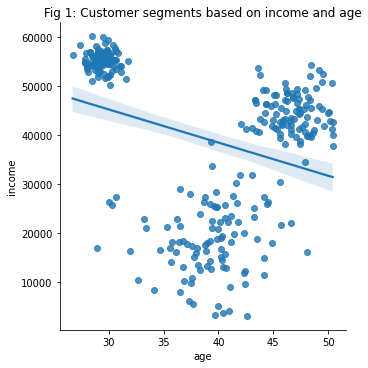

In [14]:
sn.lmplot(data=customers_df, x='age', y = 'income');
plt.title("Fig 1: Customer segments based on income and age")

# Using Elbow method and WCSS (Within Cluster Sum of Squares) for finding optimum no. of clusters:


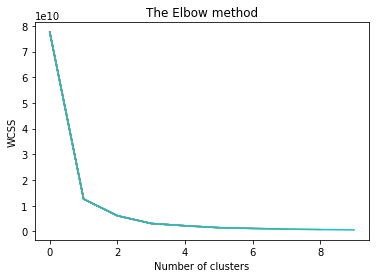

In [15]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customers_df)
    # kmeans.inertia_ = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    wcss.append(kmeans.inertia_)
    plt.plot(wcss)
    plt.title('The Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

## Creating empty cluster: From above test k can be selected as 3, and labels to it


### figure shows that k=3

In [16]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

### Now create a label for the data

In [17]:
customers_df["clusterid"] = clusters.labels_

### display the sample data

In [18]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,1
1,54100.0,28.10,2
2,47800.0,46.75,1
3,19100.0,40.25,0
4,18200.0,35.80,0


## Plotting Customers with their Segments:


Text(0.5, 1.0, 'Fig 2: Customer Segments Based on Income and Age with clusterid')

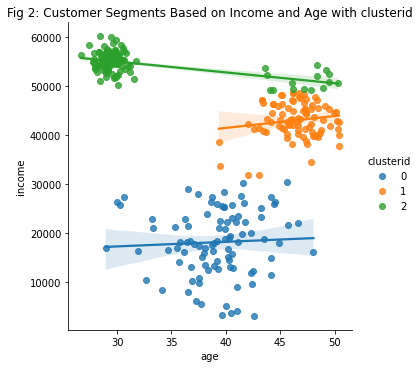

In [19]:
    sn.lmplot( data=customers_df, x="age", y="income", hue="clusterid" )
    plt.title("Fig 2: Customer Segments Based on Income and Age with clusterid")

## Repeating the same with normalization of feature:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

## Create Clusters using normalized feature set:

In [21]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

## Scatter plot after normalization:


Text(0.5, 1.0, 'Fig 3: Customer Segments Based on Income and Age with clusterid_new')

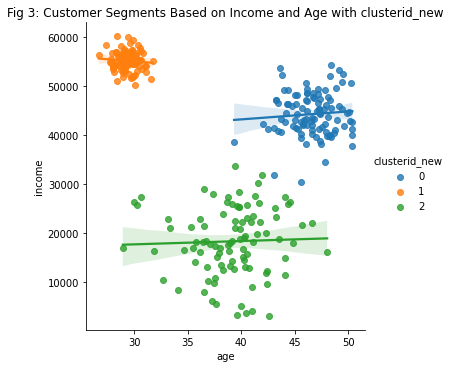

In [22]:
sn.lmplot( data=customers_df, x="age", y="income", hue="clusterid_new" )
plt.title( "Fig 3: Customer Segments Based on Income and Age with clusterid_new" )  

- If you notice, the cluster ids have changed but each data point is now more accurately assigned to its nearest cluster.
- Here is some information about each cluster:
    - Cluster 0 is high age with high income.
    - Cluster 1 is low age with high income.
    - Cluster 2 is mixed age with low income.
- Cluster 2 contains 2 quadrants (namely, low age with low salary and high age with low salary).
- Therefore, we need to try with k = 4.
- Do this as a separate exercise.